In [13]:
import pandas
import datetime
import numpy
import multiprocessing

import rt
import rt_sct_utils
import plot_utils

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.dates import date2num, DateFormatter

import time

%matplotlib inline

In [14]:
# cpu_count = multiprocessing.cpu_count()
# # radar params
# sTime = datetime.datetime(2012,2,28)#datetime.datetime(2012,2,25)
# eTime = datetime.datetime(2012,2,29)#datetime.datetime(2012,2,26)#
# date_plot = datetime.datetime(2012,2,28,2)#datetime.datetime(2012,2,25,2)
# radar = 'zho'
# sel_beam = 12
# sel_freq = 10
# sel_nhops = 2

In [15]:
cpu_count = multiprocessing.cpu_count()
# radar params
sTime = datetime.datetime(2012,2,29)#datetime.datetime(2012,2,25)
eTime = datetime.datetime(2012,3,1)#datetime.datetime(2012,2,26)#
date_plot = datetime.datetime(2012,2,29,2)#datetime.datetime(2012,2,25,2)
radar = 'zho'
sel_beam = 12
sel_freq = 10
sel_nhops = 2

In [16]:
# cpu_count = multiprocessing.cpu_count()
# # radar params
# sTime = datetime.datetime(2018,2,6,15)#datetime.datetime(2010,10,13)
# eTime = datetime.datetime(2018,2,6,20)#datetime.datetime(2010,10,14)
# date_plot = datetime.datetime(2018,2,6,18)#datetime.datetime(2010,10,13,20)
# radar = 'bks'
# sel_beam = 12
# sel_freq = 12
# sel_nhops = 1

In [17]:
start_time = time.time()
rto = rt.RtRun(start_time=sTime, end_time=eTime,\
               radar_code=radar, beam=sel_beam,\
               out_dir='/tmp/', nprocs=cpu_count,\
              nhops=sel_nhops,freq=sel_freq)
print("--- %s seconds ---" % (time.time() - start_time))

tt1--> 0.0
--- 349.3941841125488 seconds ---


nhour      :: 25
nazim      :: 1
nelev      :: 551
tlat       :: -69.37999725341797
tlon       :: 76.37999725341797
saz        :: 87.08000183105469
eaz        :: 87.08000183105469
daz        :: 1.0
sel        :: 5.0
eel        :: 60.0
del        :: 0.10000000149011612
freq       :: 10.0
nhop       :: 2
year       :: 2012
mmdd       :: 229
shour      :: 25.0
ehour      :: 49.0
dhour      :: 1.0
hmf2       :: 0.0
nmf2       :: 0.0
fext       :: b'2012060_10'
outdir     :: b'None'
indir      :: b'/tmp/'
dict_keys([datetime.datetime(2012, 2, 29, 1, 0), datetime.datetime(2012, 2, 29, 3, 0), datetime.datetime(2012, 2, 29, 2, 0), datetime.datetime(2012, 2, 29, 4, 0), datetime.datetime(2012, 2, 29, 0, 0), datetime.datetime(2012, 2, 29, 7, 0), datetime.datetime(2012, 2, 29, 6, 0), datetime.datetime(2012, 2, 29, 5, 0), datetime.datetime(2012, 2, 29, 9, 0), datetime.datetime(2012, 2, 29, 10, 0), datetime.datetime(2012, 2, 29, 11, 0), datetime.datetime(2012, 2, 29, 12, 0), datetime.datetime(2012, 

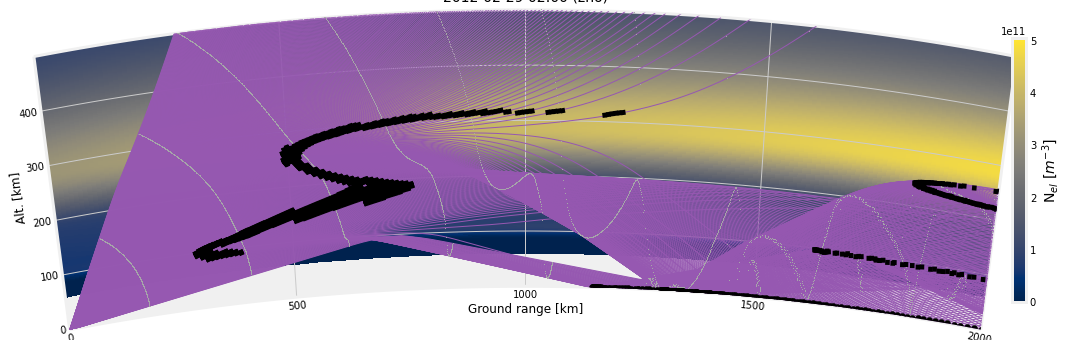

In [18]:
fig = plt.figure(figsize=(16, 6))
rays_obj = plot_utils.RayPathPlot(rto, date_plot, sel_beam)
rays_obj.plot_edens()
rays_obj.add_cbar()
_ = rays_obj.cbax.set_ylabel(r"N$_{el}$ [$m^{-3}$]", fontsize=14)
rays_obj.ax1.set_title(date_plot.strftime("%Y-%m-%d %H:%M") + " ("+radar+")", fontsize=14)
rays_obj.ax1.set_ylabel(r"Alt. [km]", size=16)
rays_obj.ax1.set_xlabel(r"Ground range [km]", size=16)

# plot rays
rays_obj.plot_rays()
# plot rays

# Plot grnd & iono scat
rays_obj.plot_scatter()
# Plot grnd & iono scat

# fig.savefig("feb29_zho_rt.png", dpi=200, bbox_inches="tight")

nhour      :: 25
nazim      :: 1
nelev      :: 551
tlat       :: -69.37999725341797
tlon       :: 76.37999725341797
saz        :: 87.08000183105469
eaz        :: 87.08000183105469
daz        :: 1.0
sel        :: 5.0
eel        :: 60.0
del        :: 0.10000000149011612
freq       :: 10.0
nhop       :: 2
year       :: 2012
mmdd       :: 229
shour      :: 25.0
ehour      :: 49.0
dhour      :: 1.0
hmf2       :: 0.0
nmf2       :: 0.0
fext       :: b'2012060_10'
outdir     :: b'None'
indir      :: b'/tmp/'
nhour      :: 25
nazim      :: 1
nelev      :: 551
tlat       :: -69.37999725341797
tlon       :: 76.37999725341797
saz        :: 87.08000183105469
eaz        :: 87.08000183105469
daz        :: 1.0
sel        :: 5.0
eel        :: 60.0
del        :: 0.10000000149011612
freq       :: 10.0
nhop       :: 2
year       :: 2012
mmdd       :: 229
shour      :: 25.0
ehour      :: 49.0
dhour      :: 1.0
hmf2       :: 0.0
nmf2       :: 0.0
fext       :: b'2012060_10'
outdir     :: b'None'
indir      

/home/bharat/Documents/code/raydarn/rt_sct_utils.py: 210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bharat/Documents/code/raydarn/rt_sct_utils.py: 210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/bharat/Documents/code/raydarn/rt_sct_utils.py: 210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

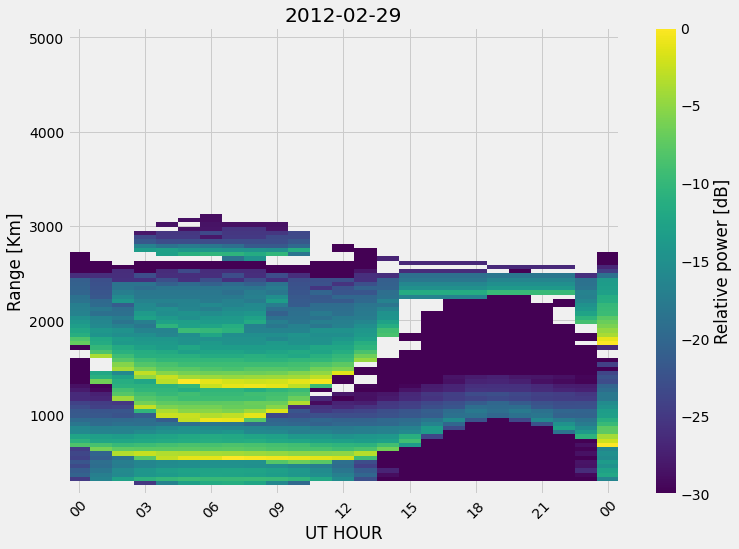

In [19]:
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

sct_plt_obj = plot_utils.RTIPlot(rto, fig, ax)
sct_plt_obj.plot_scatter()

ax.get_xaxis().set_major_formatter(DateFormatter('%H'))

ax.set_ylabel("Range [Km]")
ax.set_xlabel("UT HOUR")
ax.set_title(date_plot.strftime("%Y-%m-%d"))

plt.xticks(rotation=45)
# cb = fig.colorbar(gnd_rti_plot)
# cb.set_label("Relative power [dB]")

ax.grid()
# fig.savefig("feb29_zho_rti.png", dpi=200, bbox_inches="tight")